In [1]:
!pip install Pillow

In [4]:
from PIL import Image

#### traiter data

In [13]:
import os

In [38]:
import numpy as np

In [15]:
input_folder="./data/cats"

In [27]:
input_folder2="./data/dogs"

In [16]:
output_folder="./data/cats_resized"

In [28]:
output_folder2="./data/dogs_resized"

In [29]:
os.makedirs(output_folder2,exist_ok=True)

In [18]:
os.makedirs(output_folder,exist_ok=True)

In [42]:
compteur=1

In [39]:
X=[]
Y=[]

In [43]:
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path=os.path.join(input_folder,filename)
        img=Image.open(img_path)
        img_resized=img.resize((128,128))
        nouveau_nom = f"cat{compteur}.jpg"
        img_array=np.array(img_resized) #transformmer image en pixel
        save_path=os.path.join(output_folder,nouveau_nom)
        img_resized.save(save_path)
        X.append(img_array)
        Y.append(0) #label 0 pour cat et 1 pour dog 
        compteur += 1




In [44]:
compteur=1

In [45]:
for filename in os.listdir(input_folder2):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path=os.path.join(input_folder2,filename)
        img=Image.open(img_path)
        img_resized=img.resize((128,128))
        nouveau_nom = f"dog{compteur}.jpg"
        img_array=np.array(img_resized)
        save_path=os.path.join(output_folder2,nouveau_nom)
        img_resized.save(save_path)
        X.append(img_array)
        Y.append(1) #label 1 pour dog 
        compteur += 1


In [63]:
x=np.array(X)
y=np.array(Y)

In [47]:
!pip install matplotlib

In [48]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


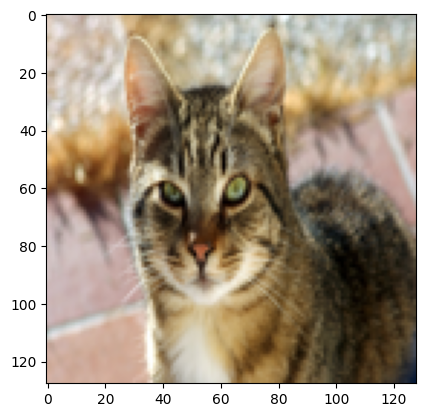

In [53]:
plt.imshow(x[0])

In [57]:
!pip install scikit-learn

In [71]:
X_flat = x.reshape(len(x), -1)


### Entrainement du modéle 

#### SVM : support vector machine 

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [68]:
from sklearn.svm import SVC

In [75]:
model=SVC(kernel='linear',verbose=True)

In [76]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

In [77]:
model.fit(X_train,Y_train)

[LibSVM]

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,True


In [78]:
y_pred=model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [83]:
print("précision" , accuracy_score(Y_test,y_pred))

précision 0.8461538461538461
